# Tutorial 1 Basics

Tutorial prerequisites:

 * Answer this question with pen and paper, without looking up any references:

>Write a program that prints the numbers from 1 to 100. But for multiples of 3, print “Fizz” instead of the number and for the multiples of 5, print “Buzz”. For numbers which are multiples of both 3 and 5 print “FizzBuzz”."
 
 * Python3 setup: how to start up a Jupyter notebook, install and load `baltic3` modules for use. Optionally, how to set a `PYTHONPATH`.
 * Required libraries: `pandas` (mostly) and `numpy` (rarely). 
 * Some prior experience with `matplotlib`, or `ggplot` from R. i.e. you've at least drawn a basic figure in command line before.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.collections import PatchCollection, LineCollection
#import matplotlib.path as mpath
#import matplotlib.lines as mlines
#import seaborn as sns

import numpy as np
import pandas as pd
import os
#os.chdir("/users/dten0001/Google Drive/baltic3/examples")
import sys
from functools import reduce
import subprocess
import time
from Bio import Phylo

# Set random state
my_randomstate = np.random.RandomState(12345)

import xio
import my_utils as xu
import biophylo_utils as bpu
import baltic3 as bt
import baltic3_utils as btu


## Baltic Objects, and a simple Plot

In [2]:
# load tree. This will print out a bunch of stats as well
bt_tre = btu.austechia_read_tree("H3_test_tree.nex", date_delim="|")

Number of objects found in tree string: 1199

Tree height: 0.026984
Tree length: 1.004646
strictly bifurcating tree

Numbers of objects in tree: 1199 (599 nodes and 600 leaves)

Highest tip date: 2017.0082


### Leaf objects

Each leaf object has a name, and (x, y) coordinates - the coordinates are the `height` and `y` attributes of the `leaf` class. We'll be using these to plot exactly where they're supposed to be.

Node objects have (`height`, `y`) coordinates as well, but don't have names, which actually makes referencing pretty difficult.

In [3]:
# Read the tipnames of the tree into a list
leaves_ls = bt_tre.leaves

my_leaf = leaves_ls[0]
print("leaf name = %s " % my_leaf.name)
print("leaf coordinates = (%s, %s)" % (my_leaf.height, my_leaf.y))

# Read all node and leaf objects of the tree into a list
obj_ls = bt_tre.Objects

leaf name = H3N2|A/Victoria/660/2016|70961-HA|H3|VIC/Cranbourne|2016-10-26 
leaf coordinates = (0.02019599999999994, 599)


All nodes and leaves have (x, y) coordinates. We'll draw the tips as red circles, then connect the nodes and tips with black lines.

In [4]:
def draw_tree(my_tree, 
              branch_width=1, 
              tipsize=20, 
              tip_colour="red"):
    """Draws a simple tree with black branches and red tips.
    
    PARAMS
    ------
    my_tree: a baltic tree object
    branch_width: float. Branch thickness
    tipsize: float. Size of tip shape
    tip_colour: string. Colour of tip shape
    
    RETURNS
    -------
    Plots the tree. 
    """
    patches_ls = []
    lines_ls = []
    
    fig,ax = plt.subplots(figsize=(11,14),facecolor='w')

    for k in my_tree.Objects:
        c = 'k'
        x=k.height # raw (x, y) coords
        y=k.y

        xp = k.parent.height
        if x is None: # matplotlib won't plot Nones, like root
            x = 0
        if xp==None:
            xp = x

        if isinstance(k,bt.leaf) or k.branchType=='leaf':
            ax.scatter(x,y,s=tipsize,facecolor="red",edgecolor='none',zorder=11, alpha=0.4)

        elif isinstance(k,bt.node) or k.branchType=='node':
            line = np.array([[x, k.children[0].y], [x, k.children[-1].y]])
            lines_ls.append(line)
               
        line = np.array([[xp, y], [x, y]])
        lines_ls.append(line)
        
    line_collection = LineCollection(lines_ls, lw=branch_width,color='k', zorder=10)
    ax.add_collection(line_collection)

    plt.tight_layout()
    plt.show()

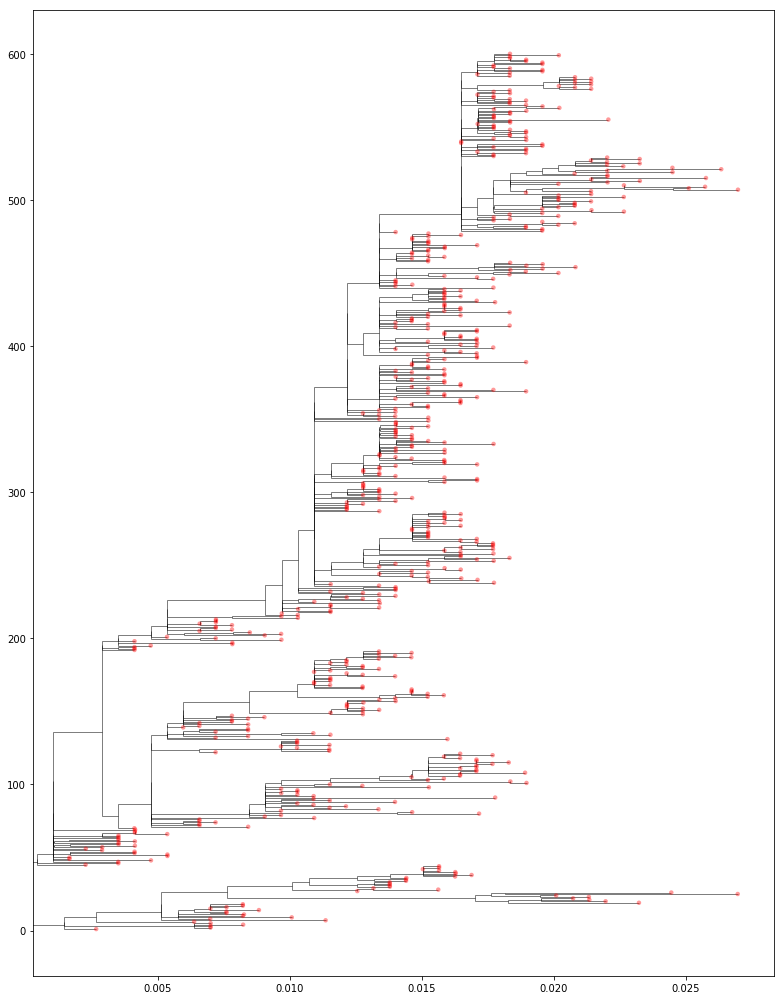

In [5]:
draw_tree(bt_tre, branch_width=0.5)